mirror_driver.ipynb
Eric Graves - eridgraves@gmail.com
Created 06/30/2019

## Mechanical Mirror Test Code
Beta code to transfer images to a stylized "low-fi" mirror representation
As seen: https://www.smoothware.com/danny/newshinyballsmirror.html

In [2]:
# Imports and environment setup
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import sys
import math
%matplotlib inline

# DEBUG shows input and output images, DEBUG_VERBOSE shows images and sizes at each step
DEBUG = True
DEBUG_VERBOSE = False

if not DEBUG :
    DEBUG_VERBOSE = False # Can only be enabled in DEBUG mode

# Test image name
TEST_IMAGE = 'Lenna.png'#'image5.png'

In [3]:
img = cv.imread(TEST_IMAGE, 0)
h,w = img.shape[:2]
if DEBUG_VERBOSE :
    print(img.shape)
    plt.imshow(img,cmap='gray') # Use grayscale image
    plt.title("Test Image")
    plt.show()

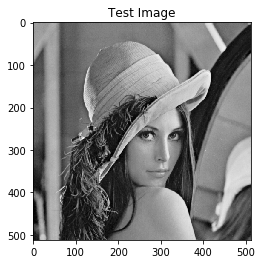

(512, 512)


In [4]:
# Determine refresh rate --> probably 1/sec or so

# Get an image and crop to square 
img_crop = img[0:h,0:h] #img.crop(0,0,h,h) #img[0:w,0:w] 
if DEBUG : 
    plt.imshow(img_crop,cmap='gray') # Use grayscale image
    plt.title("Test Image")
    plt.show()
    print(img_crop.shape)
    
# Make destination image of same size
dst = np.zeros(h);

# Use Median Blur to average pixel areas over 50 x 50 regions
#-- Calculate kernel size : must be odd
mb_kern = (int) (h/50)
if mb_kern % 2 == 0:
    mb_kern += 1
#-- Blur over kernal size 
dst = cv.medianBlur(img_crop, mb_kern)
if DEBUG_VERBOSE : 
    plt.imshow(dst,cmap='gray') # Use grayscale image
    plt.title("Blurred Image")
    plt.show()
    print(dst.shape)

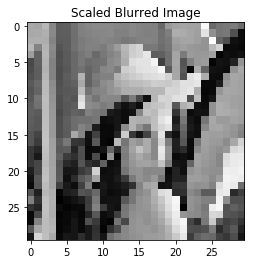

(30, 30)
[[165 163 175 143 115 117 129 139 142 144 144 144 142 141 143 141 139 138
  123 155 161 163 162 161 218 124 131 134 136 125]
 [165 166 170 144 115 116 127 138 141 142 143 144 139 139 143 141 138 139
  128 137 168 167 163 159 205 149 131 134 107  61]
 [168 169 168 141 114 115 127 135 138 140 142 141 138 133 136 139 140 139
  129 133 159 163 163 158 151 223 120 105  64  61]
 [175 141 173 145 109 115 128 136 139 139 135 144 157 175 188 195 133 134
  126 132 155 159 155 153 151 177 193  59  61  59]
 [158 118 174 143 106 114 123 132 137 124 133 140 146 173 190 195 206 115
  117 127 163 135 156 154 155 160  56  64  61  65]
 [102 118 173 139 107 114 123 133 125 128 130 144 149 168 200 205 205 215
   96 127 164 109 139 154 157  56  66  64  76 152]
 [104 116 171 140 105 112 123 129 120 127 142 145 135 190 193 202 205 206
  217 113 163 113  59 167 119  65  64  61 150 165]
 [108 116 174 141 105 115 123 173 119 135 139 139 172 182 188 193 199 201
  205 194 164 107 203 210 169  62  61 148 

In [5]:
## SQUARE OUTPUT PIXELS IN A GRID 

# Resize image to 50x50 pixels
#-- From Median Blurred Image : looks better
out = cv.resize(dst, (30,30))
if DEBUG : 
    plt.imshow(out,cmap='gray') # Use grayscale image
    plt.title("Scaled Blurred Image")
    plt.show()
    print(out.shape)
    print(out)
    
#-- Without Median Blur
dst = cv.resize(img_crop, (30,30))
if DEBUG_VERBOSE : 
    plt.imshow(dst,cmap='gray') # Use grayscale image
    plt.title("Scaled Unblurred Image")
    plt.show()
    print(dst.shape)

In [25]:
## Square OUTPUT PIXELS IN DIAGONAL GRID
##-- Stagger each row so that pixels form lines at 45degrees (or so)
##-- Center of pixels above will line up with the edges

# Get cell size
cell_diam = 30
cell_radius = (int) (cell_diam / 2)
if cell_radius % 2 == 0:
    cell_radius += 1
    
## Get first row of areas centers
centers_x_off = []
centers_x_norm = []
centers_y = []
REG_FLAG = True
cell_center = cell_radius


    
# Reset temporary array
temp = []

# Offset center column
for i in range(cell_diam, h, cell_diam):
    temp.append(i) # Just x values
    #temp.append((i, j)) # Append coordinates
row = np.array(temp)
centers_x_off.append(row)

# Reset temporary array
temp = []
 
# Regular Center column
for i in range(cell_radius, h, cell_diam): # Cut off rightmost point to make rows have equal number of members
    temp.append(i) # Just x values
    #temp.append((i, j)) # Append coordinates
row_d = np.array(temp)
centers_x_norm.append(row_d)
REG_FLAG = True


# For rows of cells in the image
for j in range(cell_center, h, cell_diam): # y-values of center points
    centers_y.append(j) # Append y coordinates to separate array
    

# Make it a numpy array so it behaves
centers_y = np.array(centers_y)
centers_x_norm = np.asarray(centers_x_norm)
centers_x_off = np.asarray(centers_x_off)

# Center points coordinates are stored:
#-- x in centers_x
#-- y in centers_y
if DEBUG:
    #print(centers_x)
    #print("CENTER_COORD: ")
    #print(centers_y.shape)
    print(centers_y)
    print(centers_x_norm)
    print(centers_x_off)
    print("Size of centers_y: " + ((str) (centers_y.size)))
    print("Size of centers_x_off: " + ((str) (centers_x_off.size)))
    print("Size of centers_x_norm: " + ((str) (centers_x_norm.size)))

## For each center point:
for y in range(0, centers_y.size - 1): # cell row number (iterator for centers_y)
    
    for x in range(0, centers_x_off.size - 1): # cell column number (iterator for centers_x) : off and norm should be the same size
        
        # Average values of each point within cell_radius
        
    # (center_x - cell_radius, center_y - cell_radius) === (center_x + cell_radius, center_y - cell_radius)
    #  ||                                                                                              ||
    #  ||                                     (center_x, center_y)                                     ||
    #  ||                                                                                              ||
    # (center_x - cell_radius, center_y + cell_radius) === (center_x + cell_radius, center_y + cell_radius)
    
# Assign all cells within cell_radius this average value

[ 15  45  75 105 135 165 195 225 255 285 315 345 375 405 435 465 495]
[[ 15  45  75 105 135 165 195 225 255 285 315 345 375 405 435 465 495]]
[[ 30  60  90 120 150 180 210 240 270 300 330 360 390 420 450 480 510]]
Size of centers_y: 17
Size of centers_x_off: 17
Size of centers_x_norm: 17


NameError: name 'point' is not defined

In [ ]:
# TODO:
#-- One region per motor
#-- Median filter? Or focus on edges, and transfer each to nearest region.

# Send to output
#-- Can this be parallelized?
#-- For now: print out as text